In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# Define your data
data = {'age': ['<25', '<25', '25-35', '>35', '>35', '>35', '25-35', '<25', '<25', '>35', '<25', '25-35', '25-35', '>35', '<25'],
        'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium', 'high'],
        'gender': ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'male'],
        'm_status': ['single', 'married', 'single', 'single', 'single', 'single', 'married', 'married', 'single', 'married', 'single', 'married', 'single', 'married', 'single'],
        'buys': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no']}

In [3]:
# Create a DataFrame
df = pd.DataFrame(data)

In [4]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])
df['income'] = le.fit_transform(df['income'])
df['gender'] = le.fit_transform(df['gender'])
df['m_status'] = le.fit_transform(df['m_status'])
df['buys'] = le.fit_transform(df['buys'])

In [5]:
# Split the data into features and target
X = df.drop('buys', axis=1)
y = df['buys']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

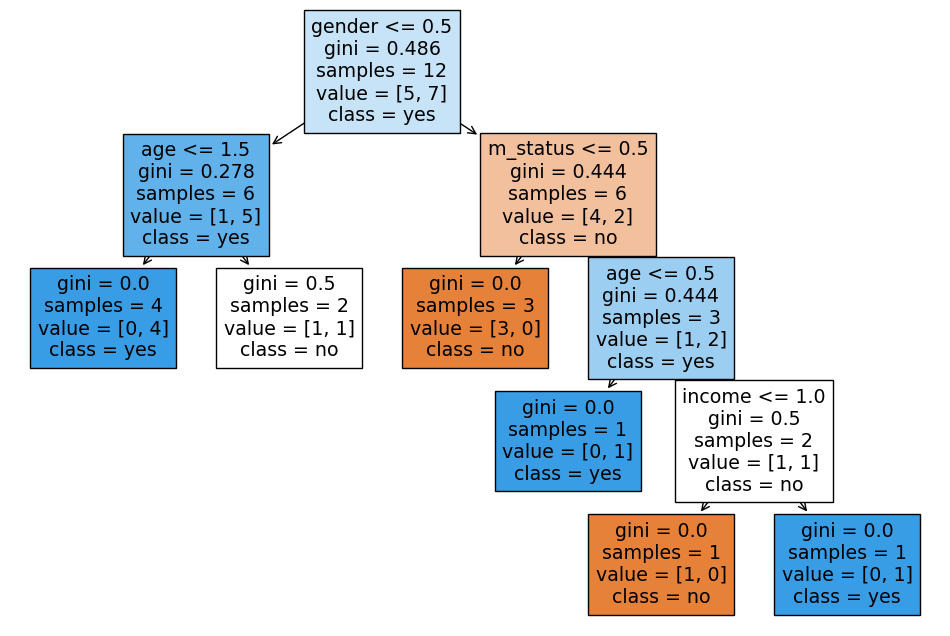

In [8]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()

In [9]:
# Print the rules of the decision tree
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print(tree_rules)

|--- gender <= 0.50
|   |--- age <= 1.50
|   |   |--- class: 1
|   |--- age >  1.50
|   |   |--- class: 0
|--- gender >  0.50
|   |--- m_status <= 0.50
|   |   |--- class: 0
|   |--- m_status >  0.50
|   |   |--- age <= 0.50
|   |   |   |--- class: 1
|   |   |--- age >  0.50
|   |   |   |--- income <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- income >  1.00
|   |   |   |   |--- class: 1



In [10]:
# Test the model on the test set
accuracy = dt_classifier.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.3333333333333333
